<a href="https://colab.research.google.com/github/xiaoouwang/clean_fast_ai/blob/master/01_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [11]:
#hide
from fastbook import *

# Your Deep Learning Journey

In [26]:
# CLICK ME
from fastai.vision.all import *

#  download, extract and return a path object
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()

#item_tfms transforms/rescales data to 224pixels, seed is for train/test split, not training
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

# the original class is cnn_learner, resnet = architecture, 34 = nlayers
# here, pretrained = True, default behavior
learn = vision_learner(dls, resnet34, metrics=error_rate)

# epoch

learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.166674,0.017027,0.007442,00:55


epoch,train_loss,valid_loss,error_rate,time
0,0.061594,0.023989,0.005413,01:12


### Sidebar: This Book Was Written in Jupyter Notebooks

In [23]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.021766


## Deep Learning Is Not Just for Image Classification

In [27]:
path = untar_data(URLs.CAMVID_TINY)

dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1142: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,2.822830,2.414457,00:02


epoch,train_loss,valid_loss,time
0,1.863070,1.689066,00:02
1,1.616742,1.516437,00:02
2,1.486073,1.124312,00:02
3,1.341078,0.906275,00:02
4,1.198260,0.789408,00:02
5,1.080652,0.778858,00:02
6,0.985029,0.728077,00:02
7,0.910674,0.714166,00:02


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1142: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


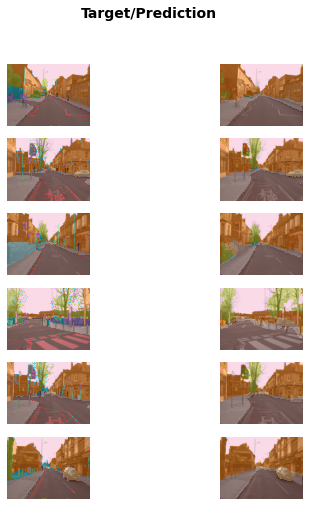

In [28]:
learn.show_results(max_n=6, figsize=(7,8))

In [29]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.455742,0.424311,0.813400,03:21


epoch,train_loss,valid_loss,accuracy,time
0,0.310756,0.286130,0.876920,07:18
1,0.231209,0.247355,0.906320,07:18
2,0.182765,0.197935,0.926320,07:17
3,0.151534,0.191952,0.929520,07:17


If you hit a "CUDA out of memory error" after running this cell, click on the menu Kernel, then restart. Instead of executing the cell above, copy and paste the following code in it:

```
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)
```

This reduces the batch size to 32 (we will explain this later). If you keep hitting the same error, change 32 to 16.

In [30]:
learn.predict("I really liked that movie!")

('pos', TensorText(1), TensorText([1.1912e-04, 9.9988e-01]))

In [31]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [32]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.392799,0.372268,0.827396,00:04
1,0.366260,0.355244,0.833692,00:03
2,0.352959,0.348594,0.835534,00:03


In [33]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.510327,1.414585,00:00


epoch,train_loss,valid_loss,time
0,1.377823,1.362061,00:00
1,1.304154,1.198421,00:00
2,1.071466,0.893439,00:00
3,0.820102,0.735820,00:00
4,0.695382,0.697589,00:00
5,0.645592,0.687191,00:00
6,0.620695,0.681363,00:00
7,0.608506,0.678536,00:00
8,0.587755,0.677682,00:00
9,0.586247,0.677584,00:00


In [34]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,9.0,13.0,2.5,3.211650
1,8.0,59.0,4.5,4.266809
2,13.0,81.0,5.0,4.123609
3,100.0,84.0,3.0,3.822870
4,91.0,12.0,3.0,3.055457
5,67.0,57.0,3.5,3.401981
6,21.0,81.0,4.0,3.731465
7,86.0,20.0,3.5,3.705634
8,62.0,65.0,4.0,3.807801
